# Projet CoCoMa - Coordination de satellites
#### Tom Bouscarat et Chanattan Sok

### Ce notebook présente notre projet dans un format de présentation qui suit la trame donnée par le sujet.

### Préparation : Instances et planification des tâches
### 1. Générateur aléatoire d'instances

In [31]:
from InstanceGenerator import *

In [32]:
nb_satellites = 3
nb_users = 3
nb_tasks = 5
seed = None
inst = generate_ESOP_instance(nb_satellites=nb_satellites, nb_users=nb_users, nb_tasks=nb_tasks, seed=seed)
print(inst.to_text())

[Parameters]
Satellites : 3
Exclusive users : 3
Tasks : 5

[Satellites]
s0 0 300 20 1
s1 0 300 20 1
s2 0 300 20 1

[Users]
u0 -
u1 s1:112-130
u2 s2:179-239
u3 s0:218-251

[Tasks]
r_0 owner=u0 window=[28,52] duration=6 reward=5
r_1 owner=u0 window=[139,205] duration=8 reward=4
r_2 owner=u0 window=[108,293] duration=5 reward=2
r_3 owner=u0 window=[65,154] duration=4 reward=1
r_4 owner=u2 window=[211,229] duration=8 reward=93

[Observations]
o_r_0_0 task=r_0 owner=u0 sat=s2 window=[30,48] duration=6 reward=5
o_r_0_1 task=r_0 owner=u0 sat=s2 window=[29,47] duration=6 reward=5
o_r_1_0 task=r_1 owner=u0 sat=s2 window=[156,189] duration=8 reward=4
o_r_1_1 task=r_1 owner=u0 sat=s2 window=[157,168] duration=8 reward=4
o_r_1_2 task=r_1 owner=u0 sat=s2 window=[195,204] duration=8 reward=4
o_r_1_3 task=r_1 owner=u0 sat=s1 window=[155,179] duration=8 reward=4
o_r_1_4 task=r_1 owner=u0 sat=s2 window=[147,205] duration=8 reward=4
o_r_1_5 task=r_1 owner=u0 sat=s2 window=[140,195] duration=8 reward=4
o

#### 2. Méthode de planification pour un utilisateur : Greedy Solver 

In [33]:
from GreedySolver import *
from AuctionSolver import *

##### Planification locale pour l'utilisateur u0 et affichage de son plan.

In [34]:
inst = generate_ESOP_instance(nb_satellites=nb_satellites, nb_users=nb_users, nb_tasks=nb_tasks, seed=seed)
plan = greedy_schedule(inst)
print_user_plans(plan)

Planning pour l'utilisateur u2:
- Sur le satellite s1:
 -> Observation o_r_3_1 (reward: 98)
> Score total: 98

Planning pour l'utilisateur u1:
- Sur le satellite s2:
 -> Observation o_r_2_0 (reward: 56)
 -> Observation o_r_0_3 (reward: 55)
> Score total: 111



##### Temps de calcul pour greedy_schedule_for_user.

In [35]:
# Moyenne de temps d'exécution pour greedy_schedule_for_user pour différentes instances ESOP.
# Vérification de l'optimalité : TODO.
import time
import numpy as np
exec_times = []

for i in range(10):
    inst = generate_ESOP_instance(nb_satellites=3 + np.random.randint(5, 10), nb_users=5 + np.random.randint(5, 10), nb_tasks=50 + np.random.randint(0, 100), seed=None)
    start_time = time.time()
    plan = greedy_schedule(inst)
    end_time = time.time()
    elapsed_time = end_time - start_time
    exec_times.append(elapsed_time)
print(f"Temps d'exécution moyen pour greedy_schedule: {sum(exec_times)/len(exec_times):.6f} secondes") # ordre de 10^-4 secondes.

Temps d'exécution moyen pour greedy_schedule: 0.000557 secondes


## Partie 1 : Optimisation de contraintes distribuées
#### 1. Génération du DCOP associé à une instance ESOP.

In [36]:
from DCOP import *
from SDcop import *

In [37]:
inst2 = generate_ESOP_instance(nb_satellites=3, nb_users=3, nb_tasks=10, seed=None)
dcop = generate_DCOP_instance(inst2)
print("Instance DCOP :")
print(dcop)

Instance DCOP :
name: esop_dcop
objective: min
domains:
  binary:
    values:
    - 0
    - 1
agents:
- u1
- u2
- u3
- aux_3
- aux_4
- aux_5
- aux_6
- aux_7
- aux_8
- aux_9
- aux_10
- aux_11
- aux_12
- aux_13
- aux_14
- aux_15
- aux_16
- aux_17
- aux_18
- aux_19
- aux_20
- aux_21
- aux_22
- aux_23
- aux_24
- aux_25
- aux_26
- aux_27
- aux_28
- aux_29
- aux_30
- aux_31
- aux_32
- aux_33
- aux_34
- aux_35
- aux_36
- aux_37
- aux_38
variables:
  x_u1_o_r_0_0:
    domain: binary
    agent: u1
  x_u3_o_r_0_1:
    domain: binary
    agent: u3
  x_u1_o_r_0_2:
    domain: binary
    agent: u1
  x_u1_o_r_0_3:
    domain: binary
    agent: u1
  x_u2_o_r_6_0:
    domain: binary
    agent: u2
  x_u2_o_r_6_3:
    domain: binary
    agent: u2
  x_u1_o_r_6_4:
    domain: binary
    agent: u1
  x_u3_o_r_6_6:
    domain: binary
    agent: u3
  x_u3_o_r_6_7:
    domain: binary
    agent: u3
  x_u2_o_r_7_0:
    domain: binary
    agent: u2
  x_u2_o_r_7_1:
    domain: binary
    agent: u2
  x_u1_o_r_7_2:


#### 2. Résolution du DCOP

In [38]:
res = solve_dcop(inst2)
# L'instance inst2 est directement transformée en DCOP. NB : est nécessaire PyDcop installé et accessible dans l'environnement.
print(res)


=== Résolution DCOP avec DPOP ===

> Génération du DCOP...
Validation des fonctions de contraintes...
Toutes les fonctions sont valides
> DCOP sauvegardé dans esop_dcop.yaml

> Informations du DCOP:
  - Nombre de variables: 12
  - Nombre de contraintes: 27

Lancement de DPOP...
Temps de résolution DPOP : 1.5517 secondes

> Sortie de DPOP:
-------
{
  "agt_metrics": {
    "aux_10": {
      "activity_ratio": 0.08748403139328294,
      "count_ext_msg": {
        "_discovery_aux_10": 6,
        "x_u3_o_r_0_1": 2
      },
      "cycles": {
        "x_u3_o_r_0_1": 0
      },
      "size_ext_msg": {
        "_discovery_aux_10": 0,
        "x_u3_o_r_0_1": 6
      }
    },
    "aux_11": {
      "activity_ratio": 0.16491879827613454,
      "count_ext_msg": {
        "_discovery_aux_11": 6,
        "x_u3_o_r_6_6": 1
      },
      "cycles": {
        "x_u3_o_r_6_6": 0
      },
      "size_ext_msg": {
        "_discovery_aux_11": 0,
        "x_u3_o_r_6_6": 4
      }
    },
    "aux_12": {
      "

#### 3. Comparaison expérimentale des algorithmes enchères

In [41]:
from AuctionSolver import *
import time

inst2 = generate_ESOP_instance(nb_satellites=3, nb_users=3, nb_tasks=10, seed=None, scenario="small_scale", one_exclusive_user_per_satellite=True)

# PSI
t0 = time.time()
plan_psi, msgs_psi, load_psi = psi_solve(inst2)
t1 = time.time()
scores_psi = assess_solution(inst2, plan_psi)
time_psi = t1 - t0

# SSI
t0 = time.time()
plan_ssi, msgs_ssi, load_ssi = ssi_solve(inst2)
t1 = time.time()
scores_ssi = assess_solution(inst2, plan_ssi)
time_ssi = t1 - t0

# Regret
t0 = time.time()
plan_regret, msgs_regret, load_regret = regret_auction_solve(inst2)
t1 = time.time()
scores_regret = assess_solution(inst2, plan_regret)
time_regret = t1 - t0

print(f"PSI : reward={sum(scores_psi.values()):<6} temps={time_psi:.4f}s  messages={msgs_psi:<4} load={load_psi} bytes")
print(f"SSI : reward={sum(scores_ssi.values()):<6} temps={time_ssi:.4f}s  messages={msgs_ssi:<4} load={load_ssi} bytes")
print(f"Regret : reward={sum(scores_regret.values()):<6} temps={time_regret:.4f}s  messages={msgs_regret:<4} load={load_regret} bytes")

print("\nDétail PSI :", scores_psi)
print("Détail SSI :", scores_ssi)
print("Détail Regret :", scores_regret)

print("PSI réalisable ?", estRealisable(inst2, plan_psi))
print("SSI réalisable ?", estRealisable(inst2, plan_ssi))
print("Regret réalisable ?", estRealisable(inst2, plan_regret))


PSI : reward=116    temps=0.0024s  messages=18   load=1128 bytes
SSI : reward=116    temps=0.0023s  messages=30   load=1800 bytes
Regret : reward=116    temps=0.0055s  messages=90   load=5760 bytes

Détail PSI : {'u0': 16, 'u1': 57, 'u2': 0, 'u3': 43}
Détail SSI : {'u0': 16, 'u1': 57, 'u2': 0, 'u3': 43}
Détail Regret : {'u0': 16, 'u1': 57, 'u2': 0, 'u3': 43}
[OK] Le planning est réalisable selon les contraintes vérifiées.
PSI réalisable ? True
[OK] Le planning est réalisable selon les contraintes vérifiées.
SSI réalisable ? True
[OK] Le planning est réalisable selon les contraintes vérifiées.
Regret réalisable ? True


### Test des algorithmes sur inst2 et affichage

Erreur r_0: pi doit être strictement positif si l'observation est insérée
Erreur r_4: pi doit être strictement positif si l'observation est insérée
Erreur r_6: pi doit être strictement positif si l'observation est insérée
Erreur r_7: pi doit être strictement positif si l'observation est insérée
> SDCOP: 0/5 DCOPs résolus, 0 timeouts, 0 allocations
[ERREUR] Transition insuffisante sur s1 entre o_r_6_0 (u0) [252,257] et o_r_5_8 (u1) commençant à t=255 (tau=1).
[ECHEC] Le planning viole au moins une contrainte.
[OK] Le planning est réalisable selon les contraintes vérifiées.
Greedy plan is realisable
[OK] Le planning est réalisable selon les contraintes vérifiées.
PSI plan is realisable
[OK] Le planning est réalisable selon les contraintes vérifiées.
SSI plan is realisable
[OK] Le planning est réalisable selon les contraintes vérifiées.
Regret plan is realisable
Msg SDCOP : 0  Load SDcop : 0


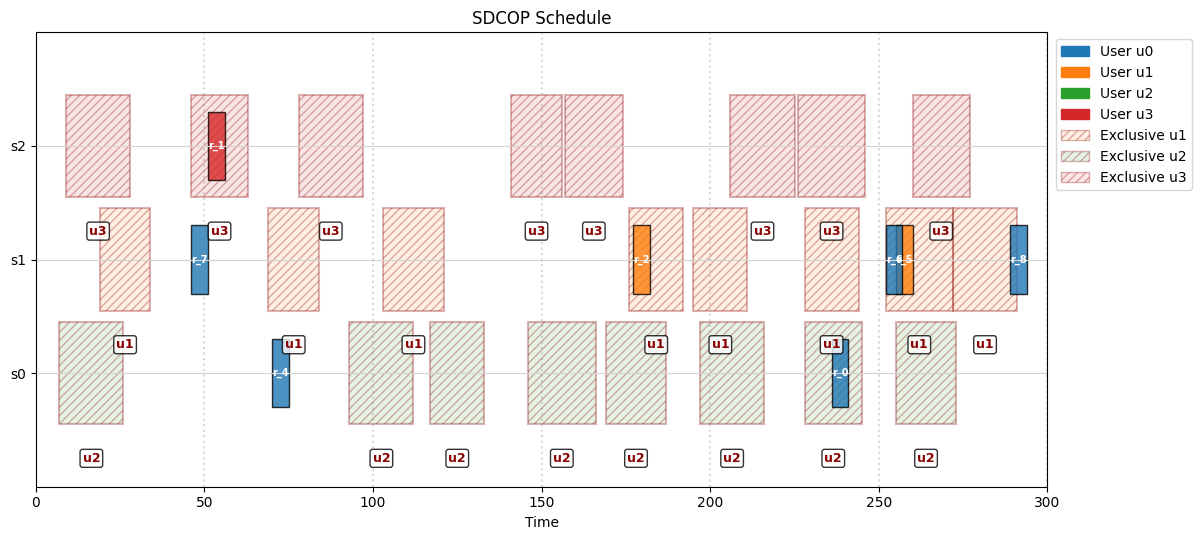

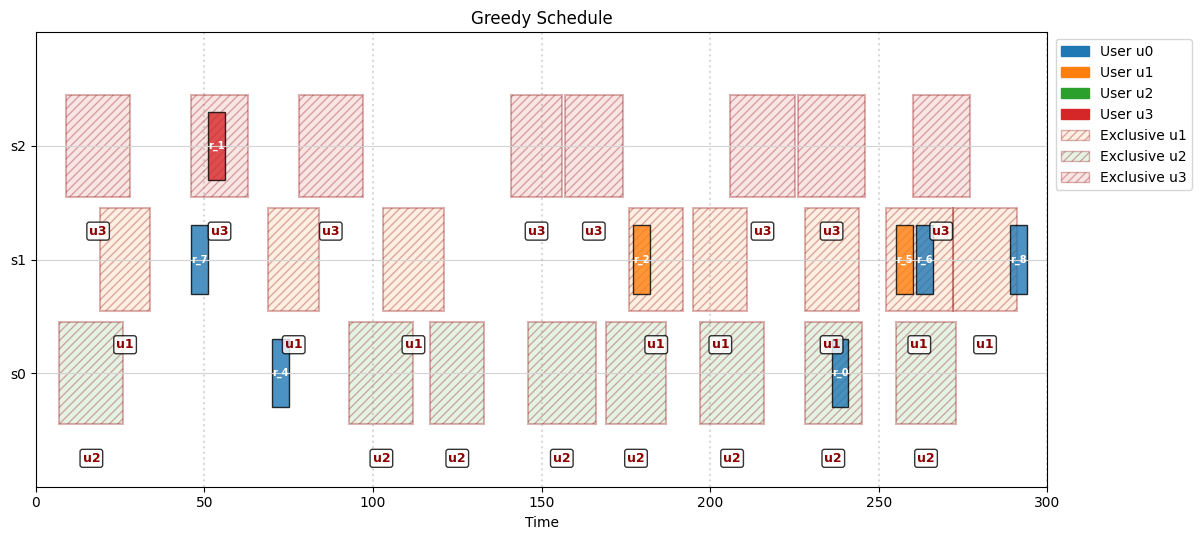

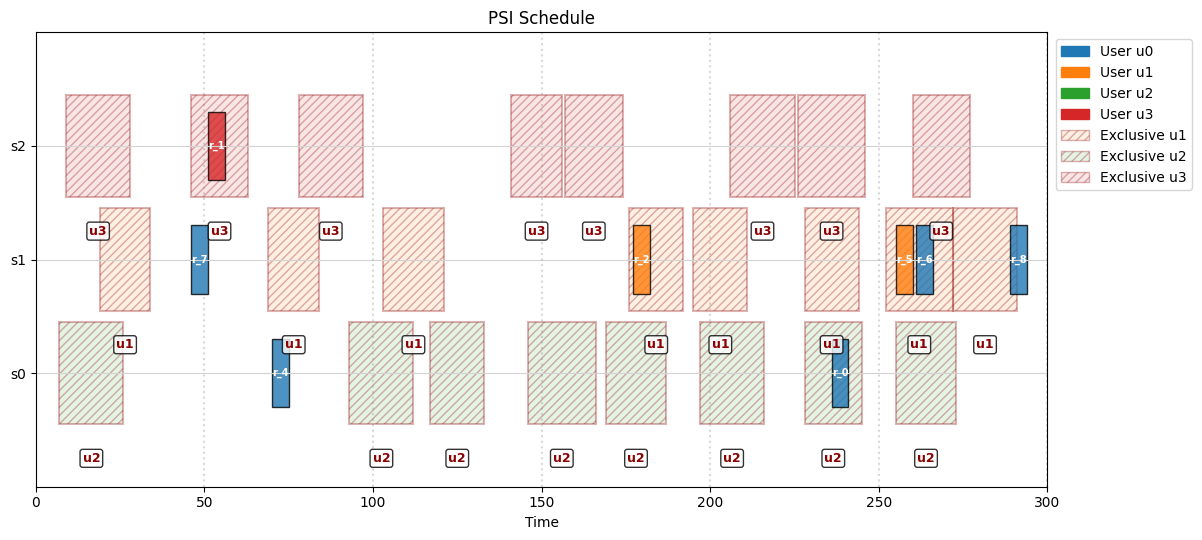

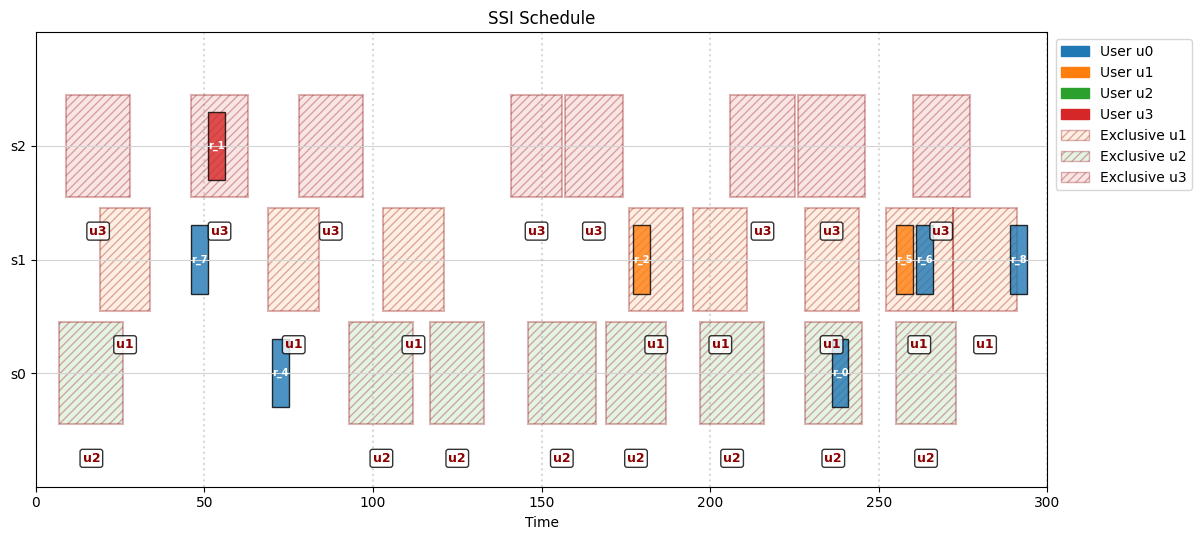

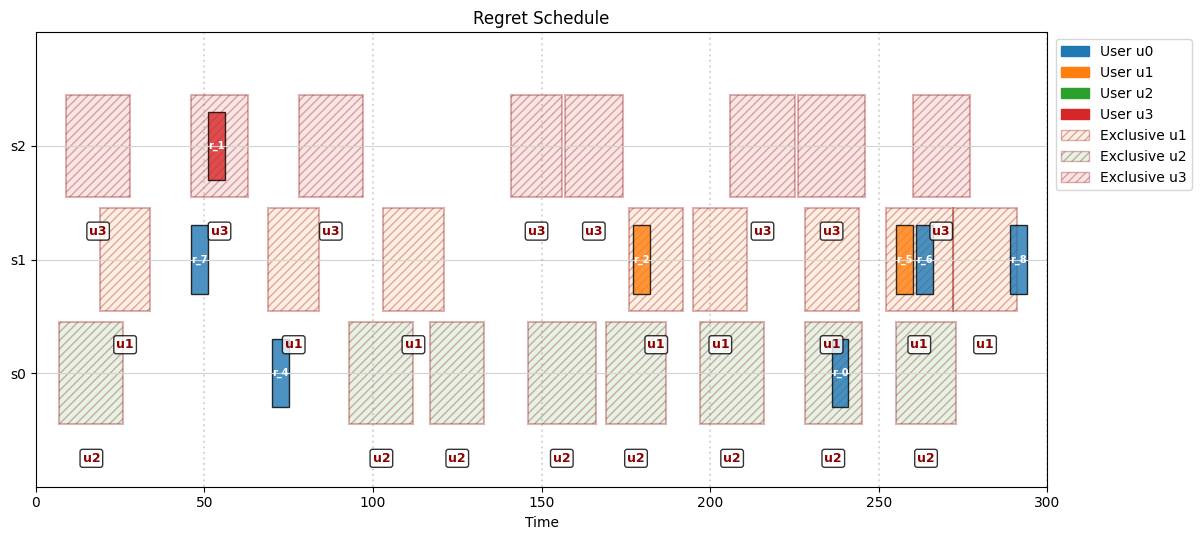

In [42]:
from StaticVisual import *

greedy_plan = greedy_schedule(inst2)

sdcop_plan, _, _, msgs, load = sdcop_with_pydcop(inst2)

plan_regret, _, _ = regret_auction_solve(inst2)

if(estRealisable(inst2, sdcop_plan)):
    print("SDCOP plan is realisable")
if(estRealisable(inst2, greedy_plan)):
    print("Greedy plan is realisable")
else:
    print("Greedy plan not realisable :", greedy_plan)
if(estRealisable(inst2, plan_psi)):
    print("PSI plan is realisable")
if(estRealisable(inst2, plan_ssi)):
    print("SSI plan is realisable")
if (estRealisable(inst2, plan_regret)):
    print("Regret plan is realisable")

print("Msg SDCOP :", msgs, " Load SDcop :", load)
plot_schedule(inst2, sdcop_plan, title="SDCOP Schedule")
plot_schedule(inst2, greedy_plan, title="Greedy Schedule")
plot_schedule(inst2, plan_psi, title="PSI Schedule")
plot_schedule(inst2, plan_ssi, title="SSI Schedule")
plot_schedule(inst2, plan_regret, title="Regret Schedule")

# Comparaison globale (expériences article)

In [ ]:
def generate_fig4_scenario(n_obs_total, seed=None):
    """
    Génère des scénarios proches de la Figure 4 de l'article : Highly Conflicting Small-Scale Problems
    
    Paramètres article (Section 6.1) :
        - Horizon: 300s (5 min)
        - 3 satellites, capacité 20
        - 4 users exclusifs, 8 fenêtres exclusives de 15-20s chacune
        - 250-1500 observations TOTALES réparties entre TOUS les users
        - env. 20% pour u0, env. 80% pour exclusifs
        - Reward u0: 1-5, exclusifs: 10-50
    """
    if seed is not None:
        random.seed(seed)
    
    horizon, nb_sats, capacity = 300, 3, 20
    satellites = [Satellite(f"s{i}", 0, horizon, capacity, transition_time=1) for i in range(nb_sats)]
    
    # u0 + 4 exclusifs
    users = [User("u0", [])]
    
    for i in range(1, 5):
        wins = []
        for _ in range(8):
            s = random.choice(satellites)
            length = random.randint(15, 20)
            start = random.randint(0, horizon - length)
            wins.append(type('obj', (object,), {'satellite': s.sid, 't_start': start, 't_end': start + length}))
        users.append(User(f"u{i}", wins))
    
    # n_obs_total = observations totales dans l'instance
    # 10 opportunités par tâche => nb_tasks = n_obs_total / 10
    nb_tasks = n_obs_total // 10
    
    # Répartition : env. 20% u0, env. 80% exclusifs
    nb_u0_tasks = max(2, int(nb_tasks * 0.2)) # Min 2 requêtes centrales
    nb_excl_tasks = nb_tasks - nb_u0_tasks
    
    tasks, observations, obs_id = [], [], 0
    
    # Tâches centrales u0
    for t_id in range(nb_u0_tasks):
        owner = "u0"
        reward = random.randint(1, 5)
        
        opps = []
        # 10 opportunités, dont 2-5 dans les exclusives
        nb_in_excl = random.randint(2, 5)
        
        # opportunités dans les exclusives
        for _ in range(nb_in_excl):
            u_excl = users[random.randint(1, 4)]
            if u_excl.exclusive_windows:
                win = random.choice(u_excl.exclusive_windows)
                duration = 5
                if win.t_end - win.t_start >= duration + 5:
                    obs_start = random.randint(win.t_start, win.t_end - duration - 1)
                    obs = Observation(f"o_{obs_id}", f"t_{t_id}", win.satellite, obs_start, obs_start + duration + 5, duration, reward, owner)
                    opps.append(obs)
                    observations.append(obs)
                    obs_id += 1
        
        # Opportunités hors exclusives
        while len(opps) < 10:
            sat = random.choice(satellites)
            obs_start = random.randint(0, horizon - 15)
            obs = Observation(f"o_{obs_id}", f"t_{t_id}", sat.sid, obs_start, obs_start + 15, 5, reward, owner)
            opps.append(obs)
            observations.append(obs)
            obs_id += 1
        tasks.append(Task(f"t_{t_id}", owner, 0, horizon, 5, reward, opps))
    
    # taches exclusives
    for t_id in range(nb_u0_tasks, nb_u0_tasks + nb_excl_tasks):
        owner = f"u{random.randint(1, 4)}"
        reward = random.randint(10, 50)
        
        u_owner = users[int(owner[1:])]
        opps = []
        
        # toutes les opportunités dans les exclusives du owner
        if u_owner.exclusive_windows:
            attempts = 0
            while len(opps) < 10 and attempts < 30:
                win = random.choice(u_owner.exclusive_windows)
                duration = 5
                if win.t_end - win.t_start >= duration + 5:
                    obs_start = random.randint(win.t_start, win.t_end - duration - 1)
                    obs = Observation(f"o_{obs_id}", f"t_{t_id}", win.satellite, obs_start, obs_start + duration + 5, duration, reward, owner)
                    opps.append(obs)
                    observations.append(obs)
                    obs_id += 1
                attempts += 1
        if opps:
            tasks.append(Task(f"t_{t_id}", owner, 0, horizon, 5, reward, opps))
    
    return ESOPInstance(nb_sats, 4, len(tasks), horizon, satellites, users, tasks, observations)


In [ ]:
def generate_fig5_instances(num_instances: int = 30):
    """
        Génère les instances proches de celles de l'article en Figure 5 (Realistic large-scale problems).
        (cf. code ESOP_instance)
    """
    # nb_tasks environ = nombre de requêtes, avec env. 5 opportunités par tâche => 500–2500 obs, mais bon ça reste approximatif
    # à check, overriden
    sizes_tasks = [100, 200, 300, 400, 500]
    nb_satellites = 8
    nb_users = 5 # exclusifs
    capacity = 500
    horizon = 21600

    instances = {nb_t: [] for nb_t in sizes_tasks}

    for nb_t in sizes_tasks:
        for seed in range(num_instances):
            inst = generate_ESOP_instance(nb_satellites=nb_satellites,
                                        nb_users=nb_users,
                                        nb_tasks=nb_t,
                                        horizon=horizon,
                                        capacity=capacity,
                                        scenario="large_scale",
                                        seed=seed,
                                        one_exclusive_user_per_satellite=False)
            instances[nb_t].append(inst)

    return instances

## Expérience et résultats comparatifs pour small-scale (cf. Figure 4 article)

Lancement Figure 4 (Highly Conflicting)
-> 250 observations...
-- Rewards
u0: task=t_0, reward=5
u0: task=t_0, reward=5
u0: task=t_0, reward=5
u0: task=t_0, reward=5
u0: task=t_0, reward=5
u0: task=t_0, reward=5
u0: task=t_0, reward=5
u0: task=t_0, reward=5
u0: task=t_0, reward=5
u0: task=t_0, reward=5
  Greedy PASS 1: exclusifs...
  Greedy PASS 2: u0...
  Greedy: 25/25 tâches satisfaites
  Greedy PASS 1: exclusifs...
  Greedy PASS 2: u0...
  Greedy: 3/3 tâches satisfaites
  Greedy PASS 1: exclusifs...
  Greedy PASS 2: u0...
  Greedy: 6/6 tâches satisfaites
  Greedy PASS 1: exclusifs...
  Greedy PASS 2: u0...
  Greedy: 3/3 tâches satisfaites
  Greedy PASS 1: exclusifs...
  Greedy PASS 2: u0...
  Greedy: 8/8 tâches satisfaites
  Greedy PASS 1: exclusifs...
  Greedy PASS 2: u0...
  Greedy: 3/3 tâches satisfaites
  Greedy PASS 1: exclusifs...
  Greedy PASS 2: u0...
  Greedy: 3/3 tâches satisfaites
  Greedy PASS 1: exclusifs...
  Greedy PASS 2: u0...
  Greedy: 6/6 tâches satisfaites
  Gree

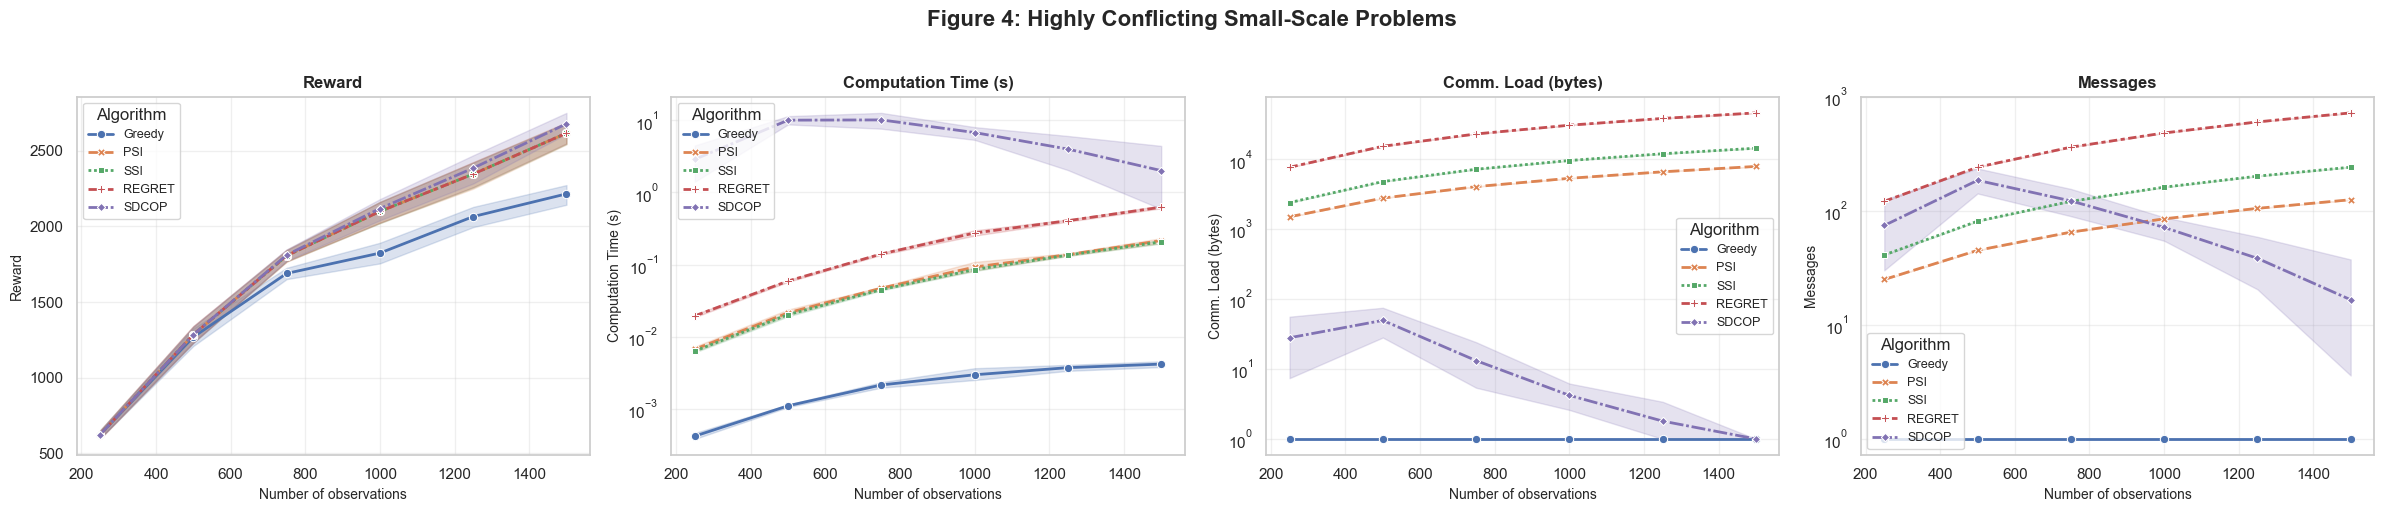

In [25]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ESOPInstance import *
from GreedySolver import greedy_schedule
from AuctionSolver import ssi_solve, psi_solve, regret_auction_solve
from SDcop import sdcop_with_pydcop

steps = [250, 500, 750, 1000, 1250, 1500]
nb_runs = 10 # moyenne
results = []

print("Lancement Figure 4 (Highly Conflicting)")
for n in steps:
    print(f"-> {n} observations...")
    for r in range(nb_runs):
        inst = generate_fig4_scenario(n, seed=r*1000+n)

        print("-- Rewards")
        for o in inst.observations[:10]:
            print(f"{o.owner}: task={o.task_id}, reward={o.reward}")
        
        # Greedy
        t0 = time.time()
        try:
            plan_greedy = greedy_schedule(inst)
            dt_greedy = time.time() - t0
            reward_greedy = sum(assess_solution(inst, plan_greedy).values())
            results.append({"nb_obs": n, "algo": "Greedy", "reward": reward_greedy, "time": dt_greedy, "msgs": 0, "load": 0})
        except Exception as e:
            print(f"Greedy failed: {e}")
        
        # PSI
        t0 = time.time()
        try:
            plan, msgs, load = psi_solve(inst)
            dt = time.time() - t0
            reward = sum(assess_solution(inst, plan).values())
            results.append({"nb_obs": n, "algo": "PSI", "reward": reward, "time": dt, "msgs": msgs, "load": load})
        except Exception as e:
            print(f"PSI failed: {e}")
        
        # SSI
        t0 = time.time()
        try:
            plan, msgs, load = ssi_solve(inst)
            dt = time.time() - t0
            reward = sum(assess_solution(inst, plan).values())
            results.append({"nb_obs": n, "algo": "SSI", "reward": reward, "time": dt, "msgs": msgs, "load": load})
        except Exception as e:
            print(f"SSI failed: {e}")
        
        # REGRET
        t0 = time.time()
        try:
            plan, msgs, load = regret_auction_solve(inst)
            dt = time.time() - t0
            reward = sum(assess_solution(inst, plan).values())
            results.append({"nb_obs": n, "algo": "REGRET", "reward": reward, "time": dt, "msgs": msgs, "load": load})
        except Exception as e:
            print(f"REGRET failed: {e}")
        
        # SDCOP
        t0 = time.time()
        try:
            plan, assignments, avg_time, msgs_sdcop, load_sdcop = sdcop_with_pydcop(inst)
            dt = time.time() - t0
            reward = sum(assess_solution(inst, plan).values())
            results.append({"nb_obs": n, "algo": "SDCOP", "reward": reward, "time": dt, "msgs": msgs_sdcop, "load": load_sdcop})
        except Exception as e:
            print(f"SDCOP failed: {e}")

df = pd.DataFrame(results)
print(df.groupby("algo")[["reward", "time", "msgs", "load"]].mean())

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1, 4, figsize=(24, 5))
titles = ["Reward", "Computation Time (s)", "Comm. Load (bytes)", "Messages"]
ekeys = ["reward", "time", "load", "msgs"]

for i, k in enumerate(ekeys):
    # Ajouter +1 pour msgs et load pour éviter log(0) pour greedy
    if k in ["msgs", "load"]:
        df_plot = df.copy()
        df_plot[k] = df_plot[k] + 1
    else:
        df_plot = df
    
    sns.lineplot(data=df_plot, x="nb_obs", y=k, hue="algo", style="algo", markers=True, ax=ax[i], linewidth=2, errorbar=("ci", 95))
    ax[i].set_title(titles[i], fontweight='bold', fontsize=12)
    ax[i].set_xlabel("Number of observations", fontsize=10)
    ax[i].set_ylabel(titles[i], fontsize=10)
    
    if i > 0:
        ax[i].set_yscale("log")
    ax[i].legend(title="Algorithm", fontsize=9)
    ax[i].grid(True, alpha=0.3)

plt.suptitle("Figure 4: Highly Conflicting Small-Scale Problems", y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


### Affichage plus grand des résultats (nécessite résultats cellule précédente)

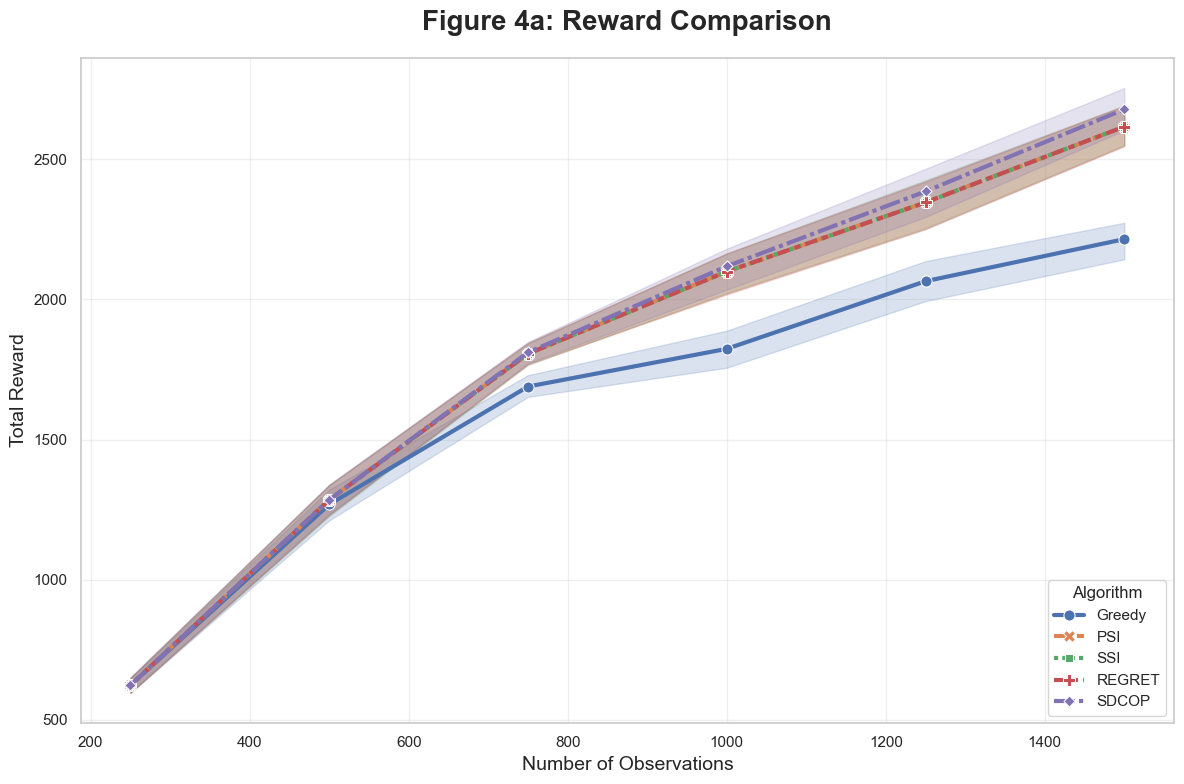

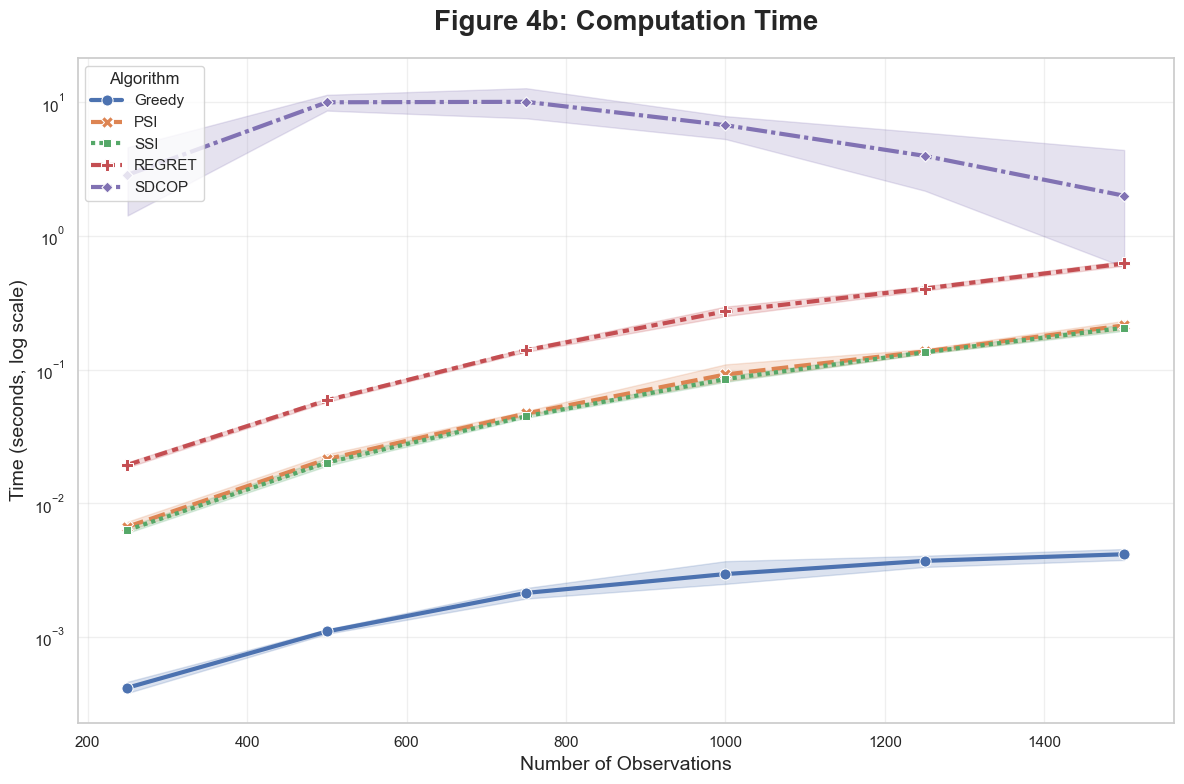

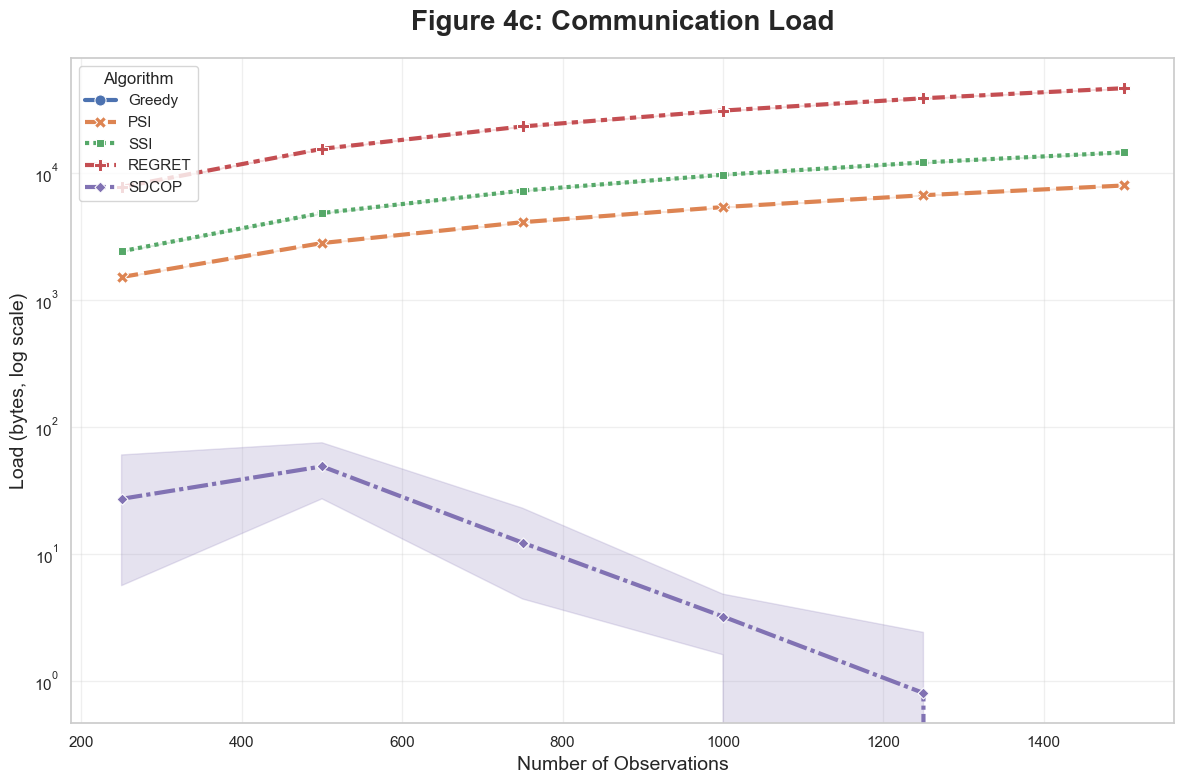

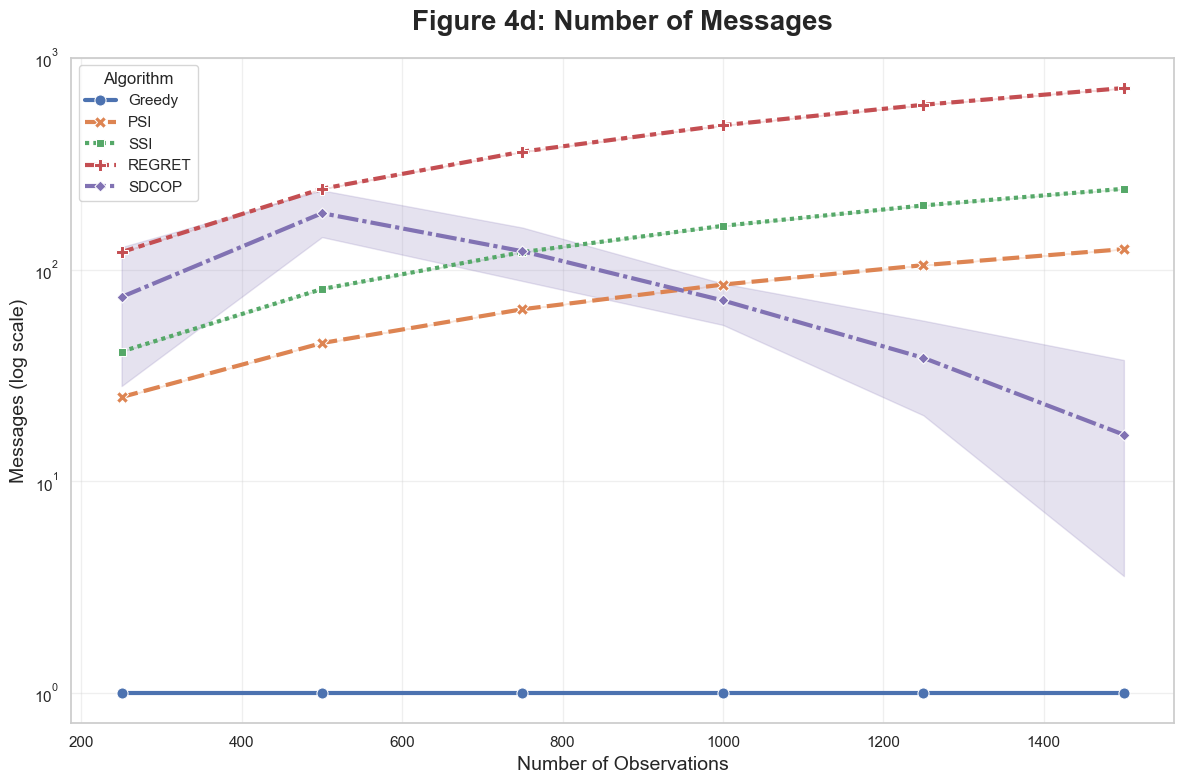

reward          time           load             msgs        
           mean     std  mean   std     mean       std   mean     std
algo                                                                 
Greedy  1614.23  547.01  0.00  0.00      0.0      0.00    1.0    0.00
PSI     1796.20  684.41  0.09  0.07   4704.0   2204.46   75.0   34.44
REGRET  1796.20  684.41  0.25  0.21  26880.0  13226.78  421.0  206.67
SDCOP   1816.95  704.24  5.95  4.45     15.3     30.62   84.6   78.87
SSI     1796.20  684.41  0.08  0.07   8400.0   4133.37  141.0   68.89

In [31]:
df = df_plot
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x="nb_obs", y="reward", hue="algo", style="algo", markers=True, linewidth=3, markersize=8)
plt.title("Figure 4a: Reward Comparison", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Number of Observations", fontsize=14)
plt.ylabel("Total Reward", fontsize=14)
plt.legend(title="Algorithm", title_fontsize=12, fontsize=11, loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x="nb_obs", y="time", hue="algo", style="algo", markers=True, linewidth=3, markersize=8)
plt.yscale("log")
plt.title("Figure 4b: Computation Time", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Number of Observations", fontsize=14)
plt.ylabel("Time (seconds, log scale)", fontsize=14)
plt.legend(title="Algorithm", title_fontsize=12, fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x="nb_obs", y="load", hue="algo", style="algo", markers=True, linewidth=3, markersize=8)
plt.yscale("log")
plt.title("Figure 4c: Communication Load", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Number of Observations", fontsize=14)
plt.ylabel("Load (bytes, log scale)", fontsize=14)
plt.legend(title="Algorithm", title_fontsize=12, fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x="nb_obs", y="msgs", hue="algo", style="algo", markers=True, linewidth=3, markersize=8)
plt.yscale("log")
plt.title("Figure 4d: Number of Messages", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Number of Observations", fontsize=14)
plt.ylabel("Messages (log scale)", fontsize=14)
plt.legend(title="Algorithm", title_fontsize=12, fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

summary = df.groupby('algo').agg({'reward': ['mean', 'std'], 'time': ['mean', 'std'], 'load': ['mean', 'std'], 'msgs': ['mean', 'std']}).round(2)
display(summary)


## Expériences large-scale (figure 5 de l'article)

=== Lancement Figure 5 (Realistic Large-Scale) ===
  -> ~500 observations...
      DCOP r_5: 2 variables
      DCOP r_7: 3 variables
      DCOP r_10: 4 variables
      DCOP r_11: 3 variables
      DCOP r_14: 2 variables
      DCOP r_20: 3 variables
      DCOP r_24: 3 variables
      DCOP r_25: 7 variables
      DCOP r_27: 3 variables
      DCOP r_28: 7 variables
      DCOP r_33: 2 variables
      DCOP r_34: 3 variables
      DCOP r_39: 2 variables
      DCOP r_42: 3 variables
      DCOP r_45: 4 variables
      DCOP r_46: 3 variables
      DCOP r_47: 3 variables
      DCOP r_48: 8 variables
      DCOP r_49: 3 variables
      DCOP r_53: 1 variables
      DCOP r_54: 4 variables
      DCOP r_55: 3 variables
      DCOP r_57: 2 variables
      DCOP r_58: 7 variables
      DCOP r_59: 1 variables
      DCOP r_60: 3 variables
      DCOP r_62: 1 variables
      DCOP r_64: 4 variables
      DCOP r_65: 2 variables
      DCOP r_67: 2 variables
      DCOP r_69: 2 variables
      DCOP r_70: 2 variabl

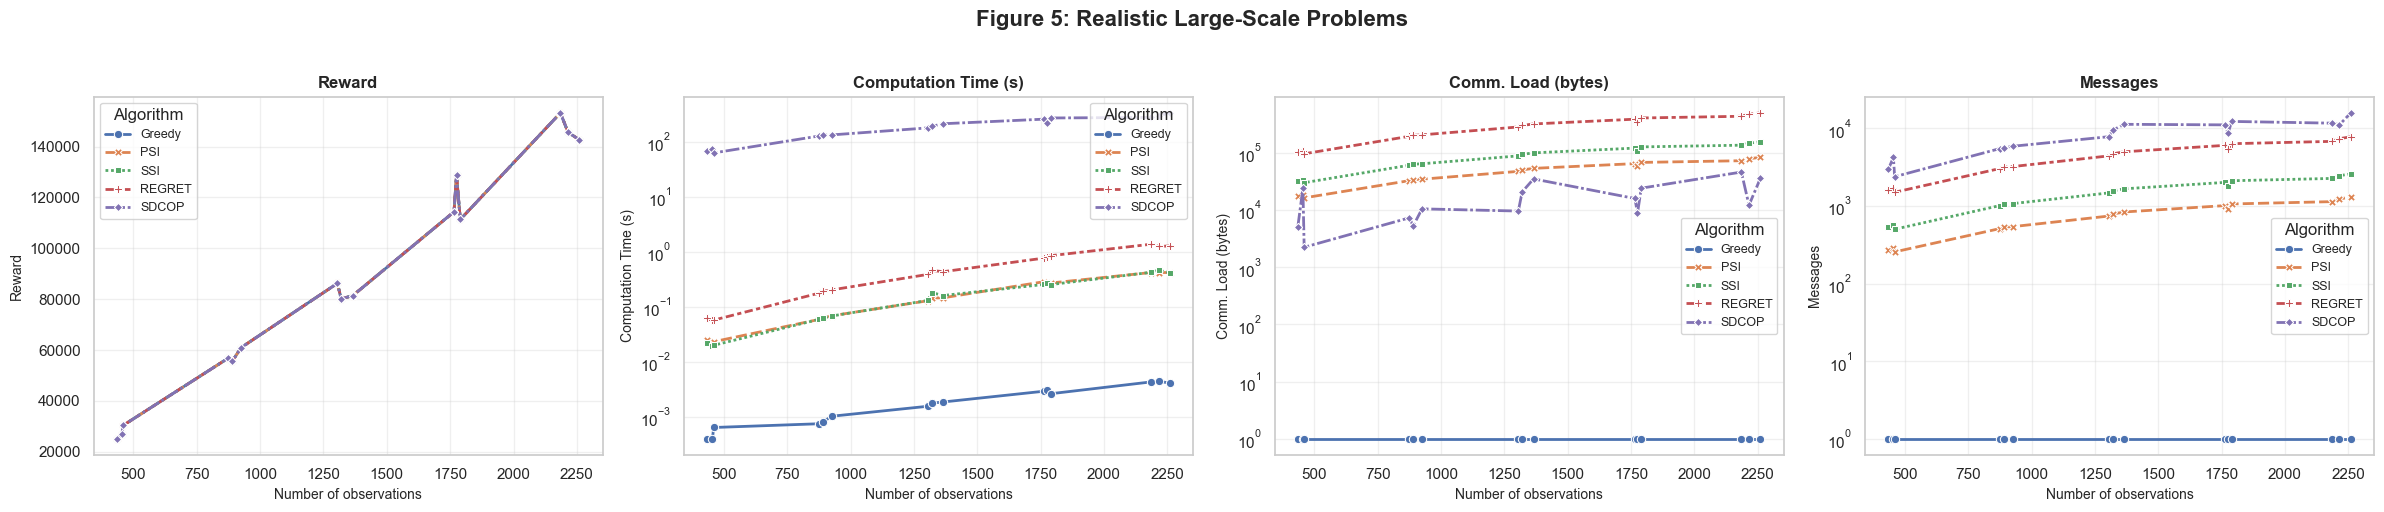

In [ ]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ESOPInstance import assess_solution
from GreedySolver import greedy_schedule
from AuctionSolver import ssi_solve, psi_solve, regret_auction_solve
from SDcop import sdcop_with_pydcop

steps = [500, 1000, 1500, 2000, 2500]
nb_runs = 10
results_5 = []

print("Lancement Figure 5 (Realistic Large-Scale)")
for n in steps:
    print(f"-> env. {n} observations...")
    for r in range(nb_runs):
        # Générateur Figure 5 (8 sats, 5 users, horizon 21600, capacity 500)
        nb_tasks = n // 5
        inst = generate_ESOP_instance(nb_satellites=8, nb_users=5, nb_tasks=nb_tasks, horizon=21600, capacity=500, scenario="large_scale", seed=r*1000+n)
        n_real = len(inst.observations)
        
        # GREEDY
        t0 = time.time()
        try:
            plan_greedy = greedy_schedule(inst)
            dt_greedy = time.time() - t0
            reward_greedy = sum(assess_solution(inst, plan_greedy).values())
            results_5.append({"nb_obs": n_real, "algo": "Greedy", "reward": reward_greedy, "time": dt_greedy, "msgs": 0, "load": 0})
        except Exception as e:
            print(f"Greedy failed: {e}")
        
        # PSI
        t0 = time.time()
        try:
            plan, msgs, load = psi_solve(inst)
            dt = time.time() - t0
            reward = sum(assess_solution(inst, plan).values())
            results_5.append({"nb_obs": n_real, "algo": "PSI", "reward": reward, "time": dt, "msgs": msgs, "load": load})
        except Exception as e:
            print(f"PSI failed: {e}")
        
        # SSI
        t0 = time.time()
        try:
            plan, msgs, load = ssi_solve(inst)
            dt = time.time() - t0
            reward = sum(assess_solution(inst, plan).values())
            results_5.append({"nb_obs": n_real, "algo": "SSI", "reward": reward, "time": dt, "msgs": msgs, "load": load})
        except Exception as e:
            print(f"SSI failed: {e}")
        
        # REGRET
        t0 = time.time()
        try:
            plan, msgs, load = regret_auction_solve(inst)
            dt = time.time() - t0
            reward = sum(assess_solution(inst, plan).values())
            results_5.append({"nb_obs": n_real, "algo": "REGRET", "reward": reward, "time": dt, "msgs": msgs, "load": load})
        except Exception as e:
            print(f"REGRET failed: {e}")
        
        # SDCOP
        t0 = time.time()
        try:
            plan, assignments, avg_time, msgs_sdcop, load_sdcop = sdcop_with_pydcop(inst, timeout_per_dcop=360)
            dt = time.time() - t0
            reward = sum(assess_solution(inst, plan).values())
            results_5.append({"nb_obs": n_real, "algo": "SDCOP", "reward": reward, "time": dt, "msgs": msgs_sdcop, "load": load_sdcop})
        except Exception as e:
            print(f"SDCOP failed: {e}")

df5 = pd.DataFrame(results_5)
print(df5.groupby("algo")[["reward", "time", "msgs", "load"]].mean())

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1, 4, figsize=(24, 5))
titles = ["Reward", "Computation Time (s)", "Comm. Load (bytes)", "Messages"]
ekeys = ["reward", "time", "load", "msgs"]

for i, k in enumerate(ekeys):
    if k in ["msgs", "load"]:
        df_plot = df5.copy()
        df_plot[k] = df_plot[k] + 1
    else:
        df_plot = df5
    
    sns.lineplot(data=df_plot, x="nb_obs", y=k, hue="algo", style="algo", markers=True, ax=ax[i], linewidth=2, errorbar=("ci", 95))
    ax[i].set_title(titles[i], fontweight='bold', fontsize=12)
    ax[i].set_xlabel("Number of observations", fontsize=10)
    ax[i].set_ylabel(titles[i], fontsize=10)
    
    if i > 0:
        ax[i].set_yscale("log")
    
    ax[i].legend(title="Algorithm", fontsize=9)
    ax[i].grid(True, alpha=0.3)

plt.suptitle("Figure 5: Realistic Large-Scale Problems", y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


### Affichage des figures en plus grand (nécessite d'exécuter la cellule d'avant pour les résultats)

In [ ]:
# df5 = pd.DataFrame(results_5)
sns.set_theme(style="whitegrid")

df5 = df_plot

plt.figure(figsize=(12, 8))
sns.lineplot(data=df5, x="nb_obs", y="reward", hue="algo", style="algo",  markers=True, linewidth=3, markersize=8)
plt.title("Figure 5a: Reward Comparison", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Number of Observations", fontsize=14)
plt.ylabel("Total Reward", fontsize=14)
plt.legend(title="Algorithm", title_fontsize=12, fontsize=11, loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
df_plot_time = df5.copy()
df_plot_time['time'] = df_plot_time['time'] + 1e-6  # éviter log(0)
sns.lineplot(data=df_plot_time, x="nb_obs", y="time", hue="algo", style="algo", markers=True, linewidth=3, markersize=8)
plt.yscale("log")
plt.title("Figure 5b: Computation Time", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Number of Observations", fontsize=14)
plt.ylabel("Time (seconds, log scale)", fontsize=14)
plt.legend(title="Algorithm", title_fontsize=12, fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
df_plot_load = df5.copy()
df_plot_load['load'] = df_plot_load['load'] + 1
sns.lineplot(data=df_plot_load, x="nb_obs", y="load", hue="algo", style="algo", markers=True, linewidth=3, markersize=8)
plt.yscale("log")
plt.title("Figure 5c: Communication Load", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Number of Observations", fontsize=14)
plt.ylabel("Load (bytes, log scale)", fontsize=14)
plt.legend(title="Algorithm", title_fontsize=12, fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
df_plot_msgs = df5.copy()
df_plot_msgs['msgs'] = df_plot_msgs['msgs'] + 1
sns.lineplot(data=df_plot_msgs, x="nb_obs", y="msgs", hue="algo", style="algo", markers=True, linewidth=3, markersize=8)
plt.yscale("log")
plt.title("Figure 5d: Number of Messages", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Number of Observations", fontsize=14)
plt.ylabel("Messages (log scale)", fontsize=14)
plt.legend(title="Algorithm", title_fontsize=12, fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

summary = df5.groupby('algo').agg({'reward': ['mean', 'std'], 'time': ['mean', 'std'], 'load': ['mean', 'std'], 'msgs': ['mean']}).round(2)
print("\n📊 RÉSUMÉ STATISTIQUES FIGURE 5 (moyenne ± std)")
display(summary)


NameError: name 'df5' is not defined

<Figure size 1200x800 with 0 Axes>